# Paris Olympic Data Analysis

The Paris 2024 Olympic Games will be the third time the city has hosted the Summer Olympics, after 1900 and 1924. The event, scheduled to take place from July 26 to August 11, 2024, promises to be a celebration of sports, sustainability, and diversity. 

## Importing Necessary Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings 
warnings.filterwarnings('ignore')

## Importing data

In [87]:
da_athletes = pd.read_csv("athletes.csv")
da_coaches =  pd.read_csv("coaches.csv")
da_events = pd.read_csv("events.csv")
da_medals = pd.read_csv("medals.csv")
da_country_medals = pd.read_csv("medals_total.csv")
da_medalist = pd.read_csv("medallists.csv")
da_vanues = pd.read_csv("venues.csv")

## Athlete analysis

### Explorying data

In [3]:
da_athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   code              11113 non-null  int64 
 1   current           11113 non-null  bool  
 2   name              11113 non-null  object
 3   gender            11113 non-null  object
 4   function          11113 non-null  object
 5   country_code      11113 non-null  object
 6   country_long      11113 non-null  object
 7   nationality       11113 non-null  object
 8   nationality_code  11113 non-null  object
 9   disciplines       11113 non-null  object
 10  events            11113 non-null  object
 11  birth_date        11113 non-null  object
dtypes: bool(1), int64(1), object(10)
memory usage: 966.0+ KB


In [4]:
da_athletes.isnull().sum()

code                0
current             0
name                0
gender              0
function            0
country_code        0
country_long        0
nationality         0
nationality_code    0
disciplines         0
events              0
birth_date          0
dtype: int64

In [5]:
da_athletes

,code,current,name,gender,function,country_code,country_long,nationality,nationality_code,disciplines,events,birth_date
0,1532872,True,ALEKSANYAN Artur,Male,Athlete,ARM,Armenia,Armenia,ARM,['Wrestling'],"[""Men's Greco-Roman 97kg""]",21-10-1991
1,1532873,True,AMOYAN Malkhas,Male,Athlete,ARM,Armenia,Armenia,ARM,['Wrestling'],"[""Men's Greco-Roman 77kg""]",22-01-1999
2,1532874,True,GALSTYAN Slavik,Male,Athlete,ARM,Armenia,Armenia,ARM,['Wrestling'],"[""Men's Greco-Roman 67kg""]",21-12-1996
3,1532944,True,HARUTYUNYAN Arsen,Male,Athlete,ARM,Armenia,Armenia,ARM,['Wrestling'],"[""Men's Freestyle 57kg""]",22-11-1999
4,1532945,True,TEVANYAN Vazgen,Male,Athlete,ARM,Armenia,Armenia,ARM,['Wrestling'],"[""Men's Freestyle 65kg""]",27-10-1999
...,...,...,...,...,...,...,...,...,...,...,...,...
11108,4986655,True,ADA ETO Sefora,Female,Athlete,GEQ,Equatorial Guinea,Equatorial Guinea,GEQ,['Athletics'],"[""Women's 100m""]",11-06-2003
11109,9460001,True,LIUZZI Emanuela,Female,Athlete,ITA,Italy,Italy,ITA,['Wrestling'],"[""Women's Freestyle 50kg""]",27-04-2000
11110,1972077,False,BOERS Isayah,Male,Athlete,NED,Netherlands,Netherlands,NED,[Athletics],[4 x 400m Relay Mixed],19-06-1999
11111,1899865,False,STAUT Kevin,Male,Athlete,FRA,France,France,FRA,[Equestrian],[Jumping Team],15-11-1980


### KPI - No. of Total Athletes

In [6]:
total_athletes = da_athletes["code"].count()
print("Total athletes in this Olympic:",total_athletes)

Total athletes in this Olympic: 11113


### No. of Male & Female Athletes

In [7]:
mfa_count = da_athletes["gender"].value_counts().reset_index()
mfa_count

,gender,count
0,Male,5658
1,Female,5455


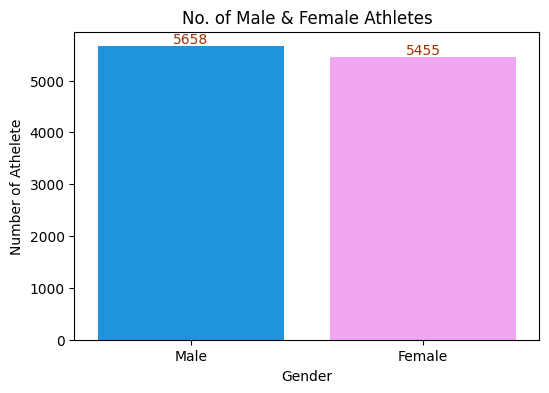

In [8]:
plt.figure(figsize=(6,4))
ax = sns.barplot(data = mfa_count,x = "gender", y = "count", hue = "gender", palette = ["#0099ff","#ff99ff"])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10,color='#993300'
               )

plt.title("No. of Male & Female Athletes")
plt.xlabel("Gender")
plt.ylabel("Number of Athelete")
plt.show()

Conclusion - The bar plot indicates a significant participation of both male and female athletes in this Paris Olympic. The number of male athletes (5658) is slightly higher than the number of female athletes (5455). The total number of athletes participating in the Paris Olympic is 11,113. This suggests a considerable level of participation from both genders.

### Male-Female Ratio

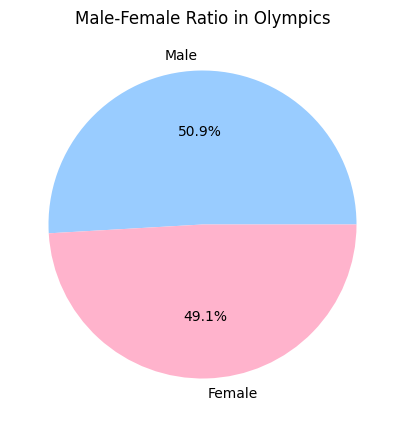

In [9]:
plt.figure(figsize=(6,5))
plt.pie(da_athletes["gender"].value_counts(), labels=["Male","Female"],autopct = '%1.1f%%', colors =['#99ccff','#ffb3cc'])
plt.title("Male-Female Ratio in Olympics")
plt.show()

Conclusion - The pie chart visually represents the gender distribution of athletes, highlighting the near-equal split between male and female participation.The number of male athletes (50.9%) is slightly higher than the number of female athletes (49.1%).

## Top 10 Countries with Highest Number of Athletes by Gender

In [10]:
athlete_counts = da_athletes.groupby(["country_long", "gender"]).size().reset_index(name='count').sort_values(by ="country_long", ascending = True)
top_countries = da_athletes["country_long"].value_counts().head(10).index
top_athlete_counts = athlete_counts[athlete_counts["country_long"].isin(top_countries)]
top_athlete_counts

,country_long,gender,count
20,Australia,Female,265
21,Australia,Male,210
65,Canada,Female,203
66,Canada,Male,129
131,France,Female,295
132,France,Male,306
139,Germany,Female,225
140,Germany,Male,232
143,Great Britain,Female,178
144,Great Britain,Male,165


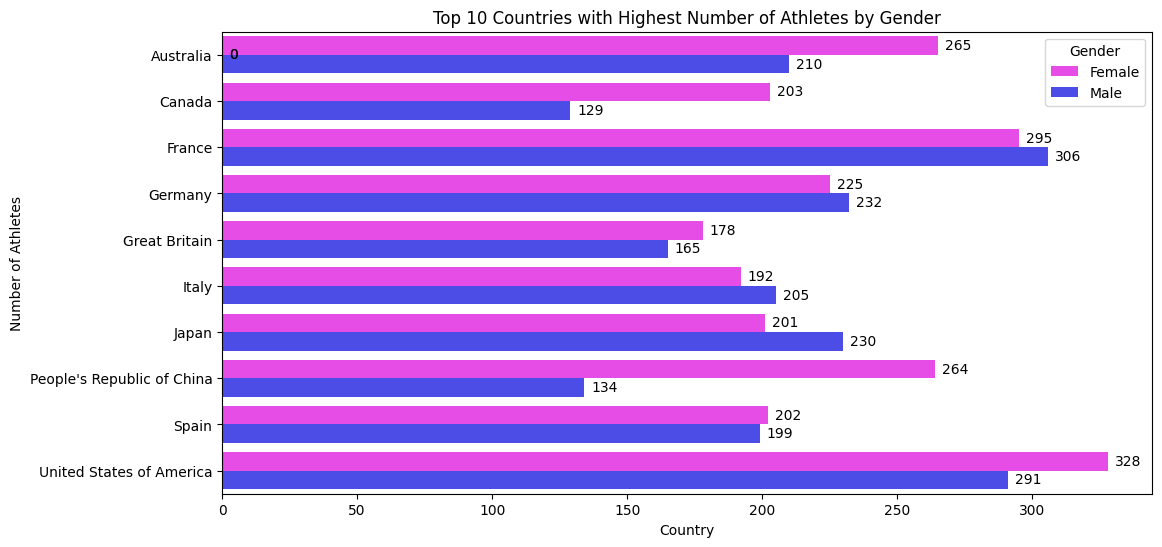

In [11]:
athlete_counts = da_athletes.groupby(["country_long", "gender"]).size().reset_index(name='count').sort_values(by ="country_long", ascending = True)
top_countries = da_athletes["country_long"].value_counts().head(10).index
top_athlete_counts = athlete_counts[athlete_counts['country_long'].isin(top_countries)]

plt.figure(figsize=(12,6))
ax = sns.barplot(data=top_athlete_counts, x='count', y='country_long', hue='gender', palette=['#ff33ff','#3333ff'])
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}',       
                (p.get_width(), p.get_y() + p.get_height() / 2),  
                ha='left', va='center',
                fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')


plt.title("Top 10 Countries with Highest Number of Athletes by Gender")
plt.legend(title= "Gender")
plt.xlabel("Country")
plt.ylabel("Number of Athletes")
plt.show()

Conclusion -
The chart displays a clear dominance of female athletes in the top 10 countries with the highest number of athletes. This trend is evident across all countries, with the number of female athletes 
 
The top 10 countries have a higher number of female athletes than male athletes. This suggests a significant shift in the participation of women in this Olympic games.

The United States leads the chart with the highest number of athletes, with a significant majority being female. This indicates a strong emphasis on women's sports in the US.

European countries dominate the top 10 list, highlighting the strong tradition of sports in these nations and their commitment to gender equality in sports.
 
The increase in female participation in sports is evident across all countries. This trend can be attributed to factors such as increased awareness of women's rights, improved access to sports facilities, and a growing number of female role models in sports.

### Top 10 Country with Lowest No. of Athletes by genders 

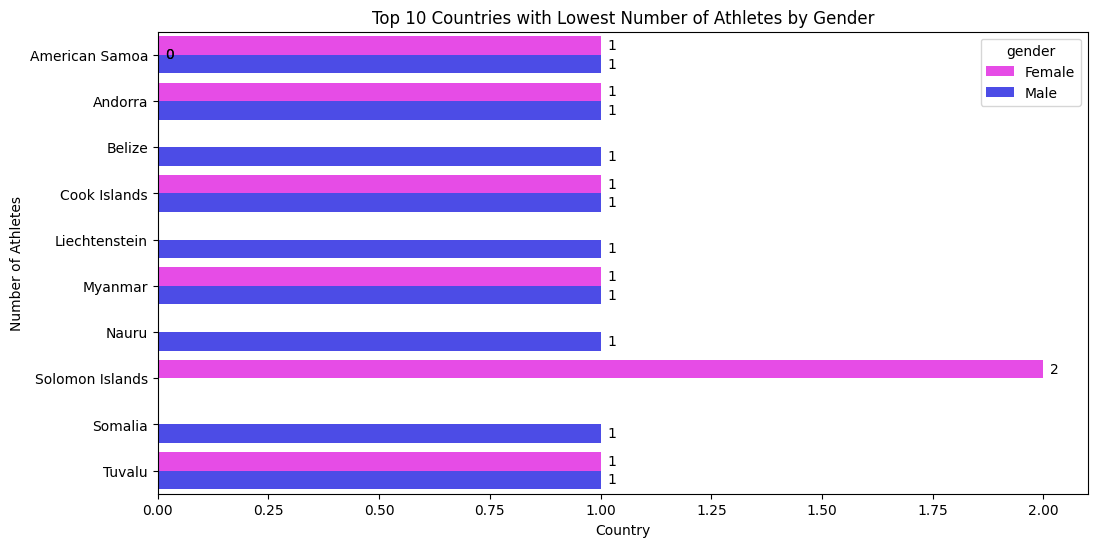

In [12]:
athlete_counts = da_athletes.groupby(["country_long", "gender"]).size().reset_index(name='count').sort_values(by ="country_long", ascending = True)
bottom_countries = da_athletes["country_long"].value_counts().tail(10).index
bottom_athlete_counts = athlete_counts[athlete_counts["country_long"].isin(bottom_countries)]

plt.figure(figsize=(12,6))
ax = sns.barplot(data=bottom_athlete_counts, x="count", y="country_long", hue="gender", palette=['#ff33ff','#3333ff'])
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}',       
                (p.get_width(), p.get_y() + p.get_height() / 2),  
                ha='left', va='center',
                fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')

plt.title("Top 10 Countries with Lowest Number of Athletes by Gender")
plt.xlabel("Country")
plt.ylabel("Number of Athletes")
plt.show()

Conclusion - This chart highlights countries with minimal athletic participation on the global stage. Notably, most of these nations send a single athlete, regardless of gender.

## Top 5 countries with highest no of Male participant

In [13]:
male_candidate = da_athletes[da_athletes["gender"]== "Male"]
count_males = male_candidate.groupby("country_long").size().sort_values(ascending = False)
top5_countrys = count_males.head(5)
top5_countrys = top5_countrys.reset_index(name = "count")
top5_countrys

,country_long,count
0,France,306
1,United States of America,291
2,Germany,232
3,Japan,230
4,Australia,210


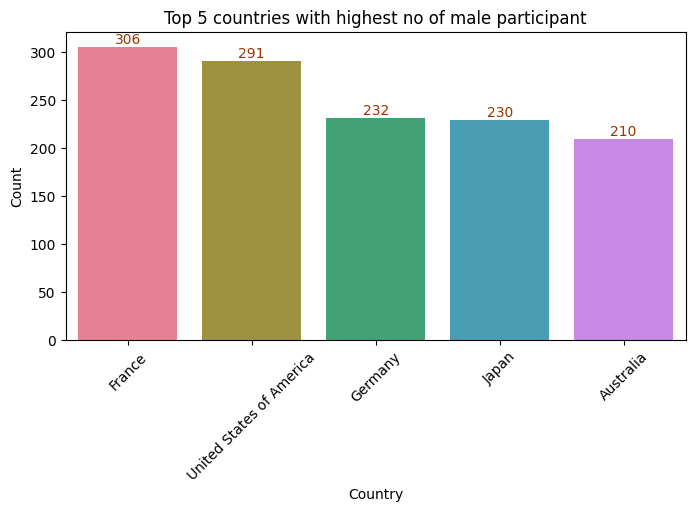

In [79]:
plt.figure(figsize=(8,4))
ax = sns.barplot(data = top5_countrys, x = "country_long", y = "count", hue = "country_long", palette = "husl" )
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', va='bottom', 
            fontsize=10,color='#993300'
               )

plt.title("Top 5 countries with highest no of male participant")
plt.xlabel("Country")
plt.xticks(rotation = 45)
plt.ylabel("Count")
plt.show()

Conclusion - This charts higlights that France leads the chart with the highest number of male participants, followed by United States of America, Germany, Japan, Australia. The countries in the top 5 have a strong sporting culture and invest heavily in the development of male athletes.

## Top 5 countries with highest no of Female participant

In [15]:
female_candidate = da_athletes[da_athletes["gender"] == "Female"]
count_females = female_candidate.groupby("country_long").size().sort_values(ascending = False)
top5_countrys_byFemale = count_females.head(5)
top5_countrys_byFemale = top5_countrys_byFemale.reset_index(name = "count")
top5_countrys_byFemale

,country_long,count
0,United States of America,328
1,France,295
2,Australia,265
3,People's Republic of China,264
4,Germany,225


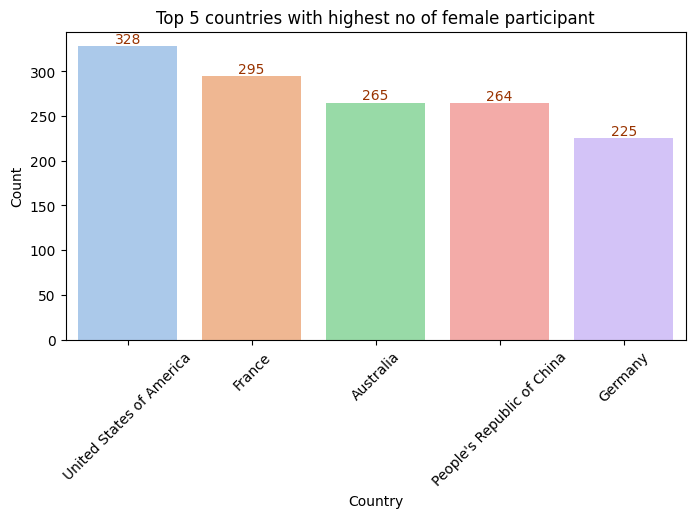

In [80]:
plt.figure(figsize=(8,4))
ax = sns.barplot(data = top5_countrys_byFemale , x = "country_long", y = "count", hue = "country_long", palette = "pastel" )
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', va='bottom', 
            fontsize=10,color='#993300'
               )

plt.title("Top 5 countries with highest no of female participant")
plt.xlabel("Country")
plt.xticks(rotation = 45)
plt.ylabel("Count")
plt.show()

Conclusion - The United States leads the chart with the highest number of female participants, followed by France, Australia, People's Republic of China, Germany.	These countries likely have well-established high-performance programs that identify and nurture talented female athletes.

### Top 10 games with highest no of participant

In [17]:
top_games = da_athletes.groupby("disciplines").size().reset_index(name= "count")
top_games_sorted = top_games.sort_values(by="count", ascending=False)
top_10_games = top_games_sorted.head(10)
top_10_games

,disciplines,count
5,['Athletics'],2018
40,['Swimming'],836
24,['Football'],553
33,['Rowing'],493
27,['Hockey'],415
26,['Handball'],386
28,['Judo'],378
36,['Shooting'],342
35,['Sailing'],330
34,['Rugby Sevens'],317


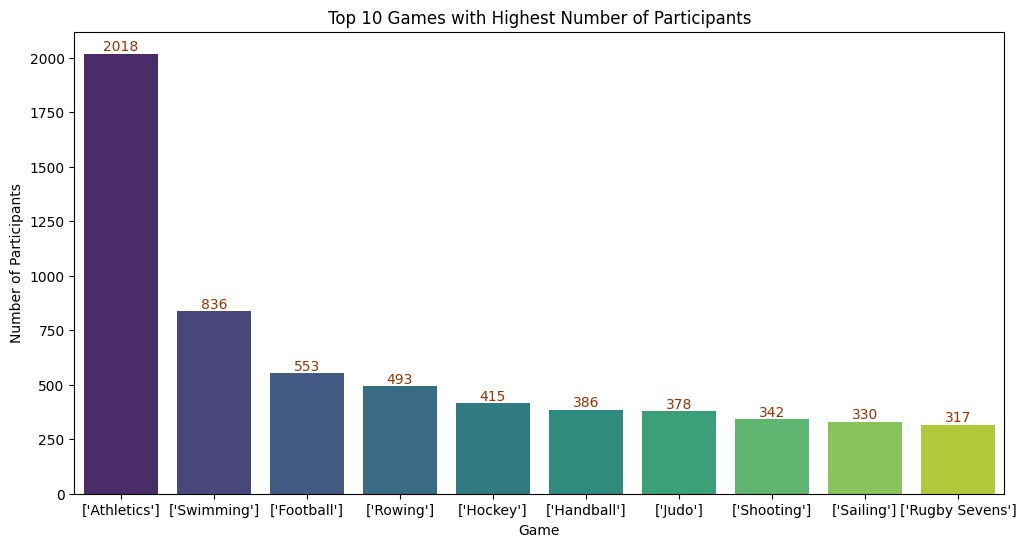

In [81]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_10_games, x='disciplines', y='count', hue ="disciplines", palette='viridis')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', va='bottom', 
            fontsize=10,color='#993300'
               )
plt.title("Top 10 Games with Highest Number of Participants")
plt.xlabel("Game")
plt.ylabel("Number of Participants")
plt.show()

Conclusion - 
The chart reflects the diverse range of sporting interests and the popularity of various sports on a global scale. 
The dominance of Athletics highlights its importance as a core sport and its ability to attract a large number of participants.
The strong showing of water sports suggests a global interest in aquatic activities and the availability of resources for these sports.
The presence of team sports in the top 10 indicates their ability to engage a large number of athletes and their appeal to a wide audience.

## Athletes Age Analysis 

#### KPI - Avarage age of Athlete

In [19]:
da_athletes["birth_date"] = pd.to_datetime(da_athletes["birth_date"],errors = "coerce")
raference_date = datetime(2024, 7, 26)
da_athletes["age"] = (raference_date - da_athletes["birth_date"]).dt.days // 365
average_age = int(da_athletes["age"].mean())
print(f"Average Age:{average_age} years")

Average Age:26 years


#### KPI - Avarage age of athlete by gender

In [20]:
avg_male_age = int(da_athletes[da_athletes["gender"]=="Male"]["age"].mean())
avg_female_age = int(da_athletes[da_athletes["gender"]=="Female"]["age"].mean())

print(f"Average Male age is:{avg_male_age} and Average Female age is:{avg_female_age}")

Average Male age is:26 and Average Female age is:26


#### Info - Youngest and Oldest Athletes by Gender 

In [21]:
male_candidate = da_athletes[da_athletes["gender"] == "Male"]
young_male_athlete = male_candidate.loc[male_candidate['age'].idxmin()]
old_male_athlete = male_candidate.loc[male_candidate['age'].idxmax()]

female_candidate = da_athletes[da_athletes["gender"] == "Female"]
young_female_athlete = female_candidate.loc[female_candidate['age'].idxmin()]
old_female_athlete = female_candidate.loc[female_candidate['age'].idxmax()]

print("Youngest and Oldest Athletes by Gender")
print(" ")
print(f"Youngest Male Athlete: Name- {young_male_athlete['name']}, Age- {young_male_athlete['age']}, Disciplines- {young_male_athlete['disciplines']}, Country- {young_male_athlete['country_long']}")
print(" ")
print(f"Oldest Male Athlete: Name- {old_male_athlete['name']}, Age-{old_male_athlete['age']}, Disciplines- {old_male_athlete['disciplines']}, Country- {old_male_athlete['country_long']}")
print(" ")
print(f"Youngest Female Athlete: Name- {young_female_athlete['name']}, Age- {young_female_athlete['age']}, Disciplines- {young_female_athlete['disciplines']}, Country- {young_female_athlete['country_long']}")
print(" ")
print(f"Oldest Female Athlete: Name- {old_female_athlete['name']}, Age- {old_female_athlete['age']}, Disciplines- {old_female_athlete['disciplines']}, Country- {old_female_athlete['country_long']}")


Youngest and Oldest Athletes by Gender
 
Youngest Male Athlete: Name- ONODERA Ginwoo, Age- 14, Disciplines- ['Skateboarding'], Country- Japan
 
Oldest Male Athlete: Name- JIMENEZ COBO Juan Antonio, Age-65, Disciplines- ['Equestrian'], Country- Spain
 
Youngest Female Athlete: Name- ZHENG Haohao, Age- 11, Disciplines- ['Skateboarding'], Country- People's Republic of China
 
Oldest Female Athlete: Name- HANNA Mary, Age- 69, Disciplines- ['Equestrian'], Country- Australia


#### Age Analysis Ploting

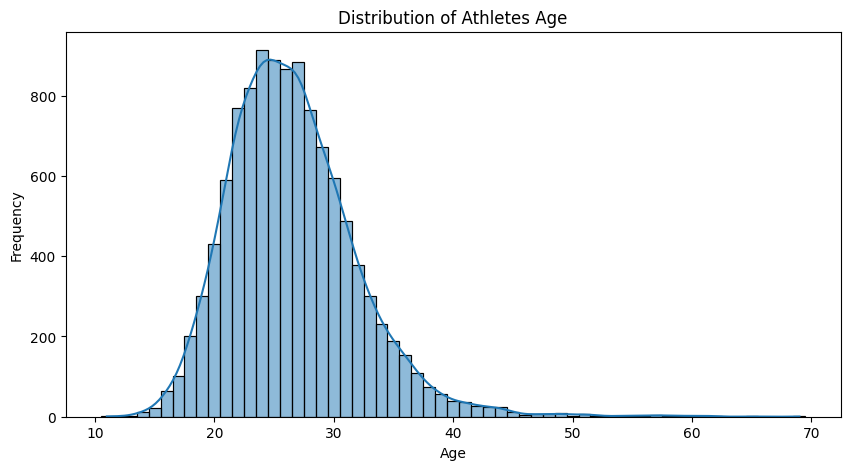

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(data = da_athletes, x = "age", bins = 10, discrete= True, kde = True,)
plt.title ("Distribution of Athletes Age")
plt.xlabel("Age") 
plt.ylabel("Frequency")
plt.show()

Conclusion - The histogram shows a distinct peak in the 20-25 age range, indicating that the majority of athletes participating in the event are young adults. The distribution is right-skewed, meaning there are more athletes in the younger age groups and fewer in the older age groups. This is a common pattern in many sports, as physical performance often peaks in younger adulthood.The number of athletes in the older age groups (40+) is significantly lower, suggesting that the event primarily attracts younger athletes.

So, we can say Olympic games prioritize younger athletes, potentially due to the physical demands of the sport.The presence of a small number of older athletes suggests that some sports may accommodate athletes of various ages, especially in events that rely more on skill and experience than physical prowess.

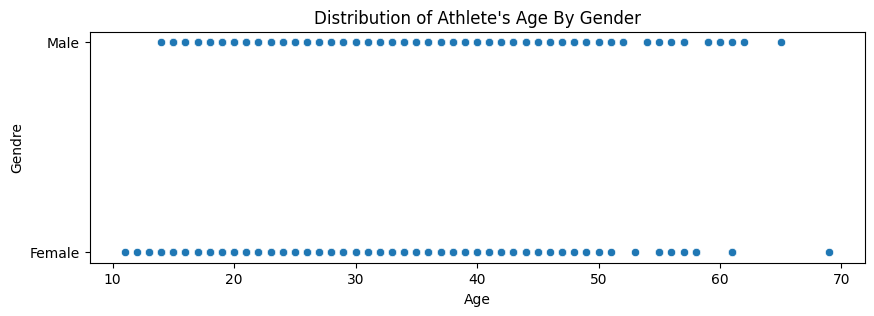

In [23]:
plt.figure(figsize=(10,3))
sns.scatterplot(data = da_athletes, x = "age", y = "gender")
plt.title ("Distribution of Athlete's Age By Gender")
plt.xlabel("Age") 
plt.ylabel("Gendre")
plt.show()

Conclusion - Both male and female athletes exhibit a similar spread of ages, with individuals ranging from approximately 10 to 65 years old. The presence of older athletes in both genders suggests that the event may accommodate athletes of different ages and fitness levels. The data doesn't indicate any significant age bias in the selection of athletes, suggesting that the focus is on performance and skill rather than age.

#### Age Grouping Analysis

In [24]:
def age_category(age):
    if age < 18:
        return "Junior"
    elif 18 <= age < 50:
        return "Adults"
    else:
        return "Senior"

da_athletes["age_group"] = da_athletes["age"].apply(age_category)

# Age group participates counts
age_group_counts = da_athletes["age_group"].value_counts().reset_index(name = "count")
print("Athlete Count in Age Group")
print(age_group_counts)
# Average age of the Age group
avg_age_by_group = da_athletes.groupby("age_group")["age"].mean().reset_index(name = "count")
print(" Avarage Age of Athlete in Age Groups")
print(avg_age_by_group)

Athlete Count in Age Group
  age_group  count
0    Adults  10871
1    Junior    203
2    Senior     39
 Avarage Age of Athlete in Age Groups
  age_group      count
0    Adults  26.661761
1    Junior  16.192118
2    Senior  55.666667


#### Number of athlete in age group


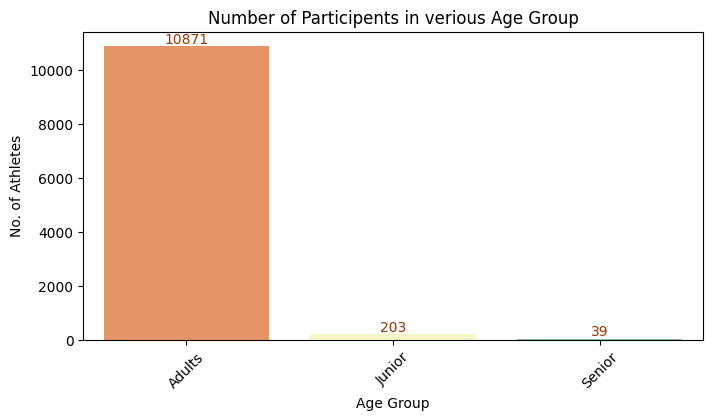

In [82]:
plt.figure(figsize=(8,4))
ax = sns.barplot(data = age_group_counts, x = "age_group", y = "count", hue = "age_group", palette= "Spectral" )
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', va='bottom', 
            fontsize=10,color='#993300'
               )
plt.title("Number of Participents in verious Age Group")
plt.xlabel("Age Group")
plt.ylabel("No. of Athletes")
plt.xticks(rotation = 45)
plt.show()

Conclusion - This bar chart presents the distribution of participants across three age groups: Adults, Juniors, and Seniors.The Adult age group clearly dominates the participation, accounting for the vast majority of participants. This indicates a strong preference for adult participation in the Olympic. The number of participants in the Junior and Senior age groups is significantly lower compared to the Adult group suggesting that there might be specific age restrictions or eligibility criteria that limit participation in the Junior and Senior age groups in verious games.

#### Average age of the Age group

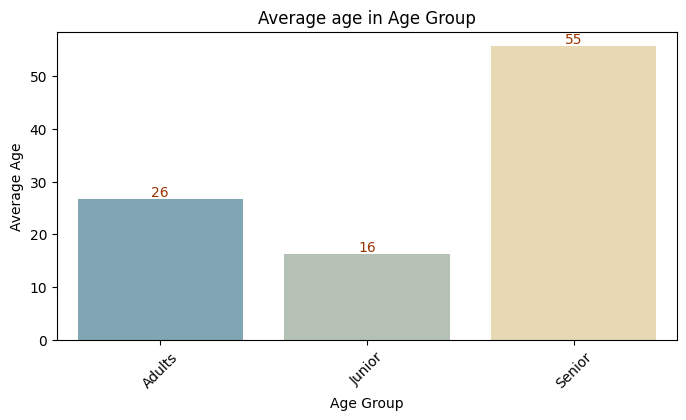

In [83]:
plt.figure(figsize=(8,4))
ax = sns.barplot(data =avg_age_by_group , x = "age_group", y = "count", hue = "age_group", palette= "blend:#7AB,#EDA" )
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', va='bottom', 
            fontsize=10,color='#993300'
               )
plt.title("Average age in Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Age")
plt.xticks(rotation = 45)
plt.show()

Conclusion - This bar chart presents the average age of participants in three different age groups: Adults, Juniors, and Seniors. The Olympic attracts participants from a wide range of ages, including young adults, teenagers, and older individuals.The diverse age range can contribute to a dynamic and inclusive atmosphere, with participants from different generations interacting and learning from each other.

## Medals Analysis 

In [27]:
da_country_medals.head(10)

,country_code,country,country_long,Gold Medal,Silver Medal,Bronze Medal,Total
0,USA,United States,United States of America,40,44,42,126
1,CHN,China,People's Republic of China,40,27,24,91
2,JPN,Japan,Japan,20,12,13,45
3,AUS,Australia,Australia,18,19,16,53
4,FRA,France,France,16,26,22,64
5,NED,Netherlands,Netherlands,15,7,12,34
6,GBR,Great Britain,Great Britain,14,22,29,65
7,KOR,Korea,Republic of Korea,13,9,10,32
8,ITA,Italy,Italy,12,13,15,40
9,GER,Germany,Germany,12,13,8,33


In [28]:
da_country_medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_code  92 non-null     object
 1   country       92 non-null     object
 2   country_long  92 non-null     object
 3   Gold Medal    92 non-null     int64 
 4   Silver Medal  92 non-null     int64 
 5   Bronze Medal  92 non-null     int64 
 6   Total         92 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 5.2+ KB


In [29]:
da_country_medals.isnull().sum()

country_code    0
country         0
country_long    0
Gold Medal      0
Silver Medal    0
Bronze Medal    0
Total           0
dtype: int64

In [30]:
da_country_medals.describe()

,Gold Medal,Silver Medal,Bronze Medal,Total
count,92.000000,92.000000,92.000000,92.000000
mean,3.576087,3.586957,4.173913,11.336957
std,6.957064,6.733796,6.537481,19.610648
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,1.000000,2.000000
50%,1.000000,1.000000,2.000000,5.000000
75%,3.000000,3.000000,5.000000,9.000000
max,40.000000,44.000000,42.000000,126.000000


### KPI - Total Medals Distribution

In [31]:
total_medals = da_country_medals["Total"].sum()
print("Total medals distributed in this Olympic:",total_medals)

Total medals distributed in this Olympic: 1043


### Correlations betweens Madels

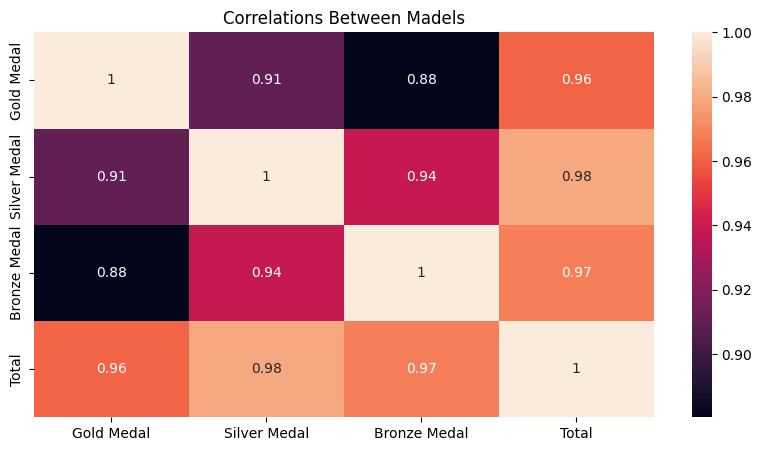

In [32]:
plt.figure(figsize=(10,5)),
sns.heatmap(da_country_medals[["Gold Medal","Silver Medal","Bronze Medal","Total"]].corr(), annot = True)
plt.title("Correlations Between Madels")
plt.show()


Conclusion - This heatmap visualizes the correlation between different medal categories (Gold, Silver, Bronze, and Total). The darker the color, the stronger the positive correlation.

The total number of medals is a good indicator of a country's overall performance in a particular event or competition. Success in one medal category often correlates with success in others, suggesting a relationship between factors like training, infrastructure, and athlete development.

### Top 10 country with Total Medals

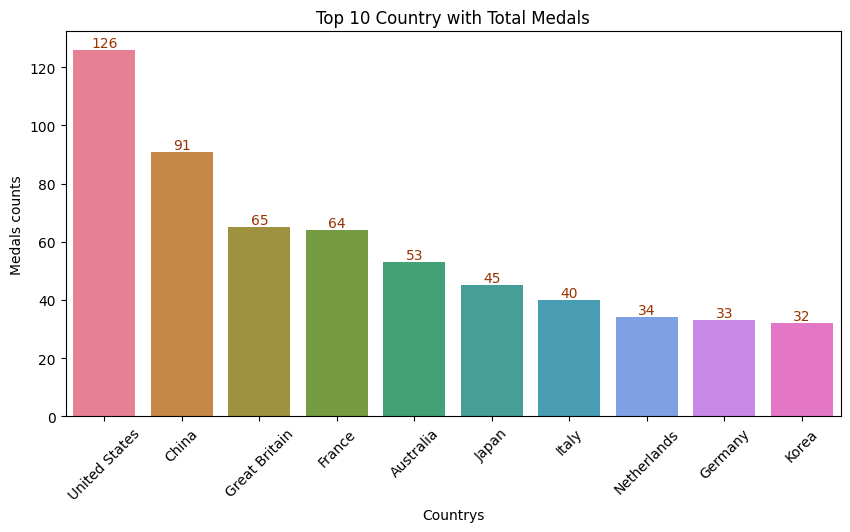

In [33]:
country_total_medals = da_country_medals[["country","Total"]].sort_values(by="Total", ascending = False)
top_10_country_Tmedals = country_total_medals.head(10)

plt.figure(figsize= (10,5))
ax = sns.barplot(data = top_10_country_Tmedals, x = "country", y ="Total", hue = "country", palette = "husl")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', va='bottom', 
            fontsize=10,color='#993300'
               )


plt.title("Top 10 Country with Total Medals")
plt.xlabel("Countrys")
plt.ylabel("Medals counts")
plt.xticks(rotation = 45)
plt.show()


This bar chart presents the top 10 countries with the highest number of total medals. It provides a visual representation of the medal distribution among these countries.

The United States' dominance in the medal tally claim its position as a global sporting powerhouse.

The strong performance of China Japan and korea highlights the increasing influence of Asian countries in the global sports arena.

European countries continue to be strong contenders, showcasing their rich sporting history and tradition.

### Top 10 Country With Medal Type

<Figure size 1000x800 with 0 Axes>

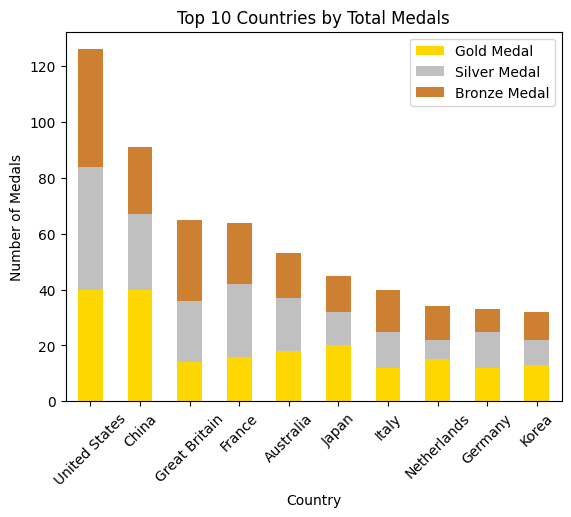

In [84]:
top_10 = da_country_medals.sort_values(by="Total", ascending = False).head(10)
top_10.set_index("country", inplace = True)

plt.figure(figsize=(10,8))
top_10[["Gold Medal","Silver Medal","Bronze Medal"]].plot(kind = "bar", stacked = True, color= ["gold","Silver","#cd7f32"])

plt.title("Top 10 Countries by Total Medals")
plt.xlabel("Country")
plt.ylabel("Number of Medals")
plt.xticks(rotation = 45)
plt.legend()
plt.show()


Conclusion - This stacked bar chart provides a visual representation of the distribution of Gold, Silver, and Bronze medals among the top 10 countries. It offers insights into the overall medal tally and the specific performance of each country in different medal categories.

The varying proportions of Gold, Silver, and Bronze medals among different countries indicate diverse strategies and strengths in different sports.

### Total Medals (Gold Silver & Bronze) with Top 10 Countries 

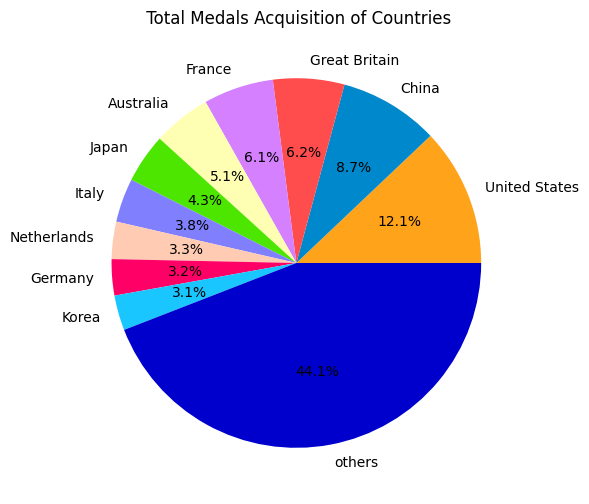

In [35]:
all_medals = da_country_medals.sort_values("Total", ascending= False)
top_10_countries = all_medals.head(10)
other_countries = all_medals.iloc[10:]
total_of_others = other_countries["Total"].sum()
labels = pd.concat([top_10_countries["country"],pd.Series("others")])
total_medals = pd.concat([top_10_countries["Total"],pd.Series(total_of_others)])
color = ["#ffa31a","#0088cc","#ff4d4d","#d580ff","#ffffb3","#4ce600","#8080ff","#ffccb3","#ff0066","#1ac6ff","#0000cc"]

plt.figure(figsize=(6,6))
plt.pie(total_medals, labels = labels, autopct = "%1.1f%%", colors= color)

plt.title(" Total Medals Acquisition of Countries")
plt.show()

Conclusion - This pie chart visualizes the distribution of total medals among various countries. It provides a clear picture of the dominance of the United States in terms of medal acquisition.

The chart shows a diverse representation of countries, highlighting the global nature of sports and the competitive landscape.The presence of diverse countries in the chart indicates a globalized nature of sports, with athletes from various nations competing at the highest level. 

### Top 10 Country with Gold Medals

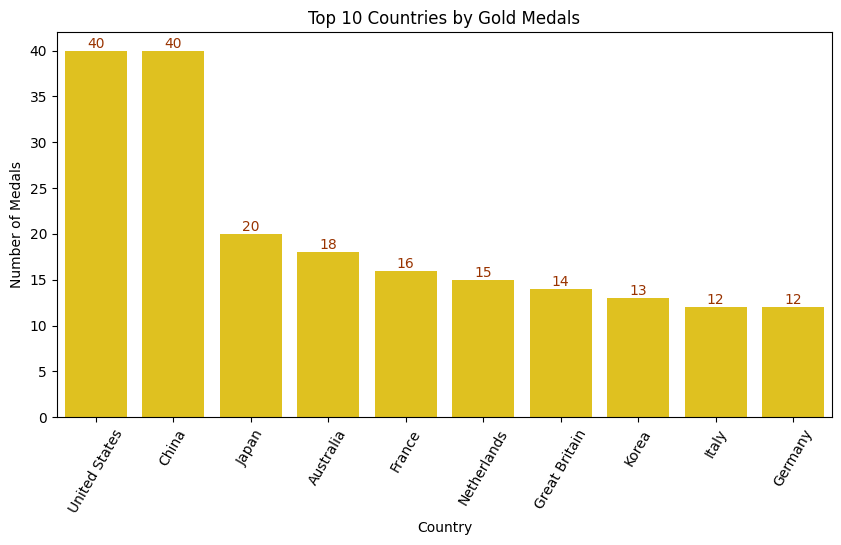

In [85]:
top_10_gold = da_country_medals.sort_values(by = "Gold Medal", ascending = False).head(10)

plt.figure(figsize=(10,5))
ax = sns.barplot(data = top_10_gold,x = "country", y = "Gold Medal", hue = "country", palette=["gold"])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', va='bottom', 
            fontsize=10,color='#993300'
               )
    
plt.title("Top 10 Countries by Gold Medals")
plt.xlabel("Country")
plt.ylabel("Number of Medals")
plt.xticks(rotation=60)
plt.show()


Conclusion - This bar chart presents the top 10 countries with the highest number of Gold medals. It provides a visual representation of the dominance of certain countries in securing the top prize in various sports. 

The US and China's dominance in Gold medals solidifies their position as global sporting superpowers. 

The strong performance of Asian countries highlights their increasing investment in sports and the development of world-class athletes. 

European countries continue to be significant players in the global sports landscape, leveraging their rich sporting history and tradition.

### Top 10 Countries with Silver Medals

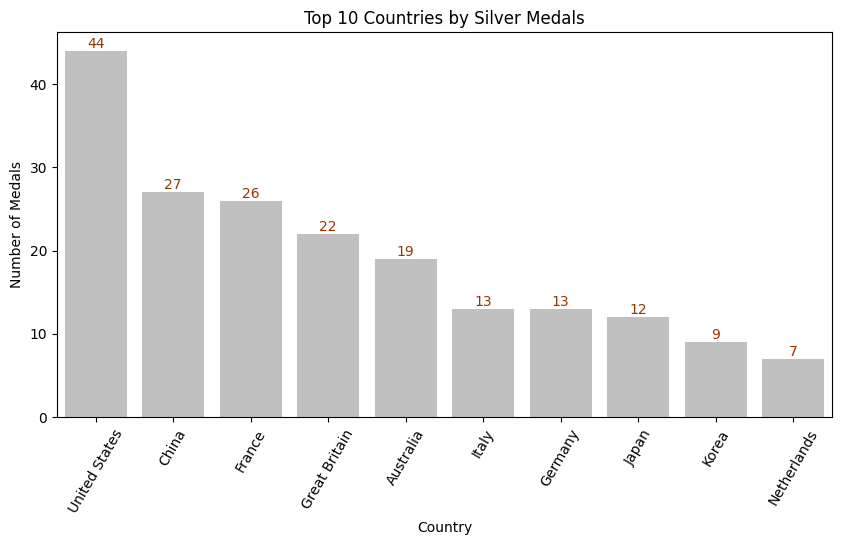

In [37]:
top_10_silver = da_country_medals.sort_values(by = "Silver Medal", ascending = False).head(10)

plt.figure(figsize=(10,5))
ax = sns.barplot(data = top_10_silver,x = "country", y = "Silver Medal", hue = "country", palette=["silver"])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', va='bottom', 
            fontsize=10,color='#993300'
               )
plt.title("Top 10 Countries by Silver Medals")
plt.xlabel("Country")
plt.ylabel("Number of Medals")
plt.xticks(rotation=60)
plt.show()

Conclusion - This bar chart presents the top 10 countries with the highest number of Silver medals. It provides a visual representation of the countries that have consistently performed well in various sports, securing second-place finishes.

The United States tops the list with the most Silver medals, showing a solid performance in various sports.

European nations remain key players in the worldwide sports scene, drawing on their deep-rooted sporting heritage and traditions.

The rising count of Silver medals for Asian nations indicates a change in the global sports power dynamics.

### Top 10 Countries with Bronze Medals

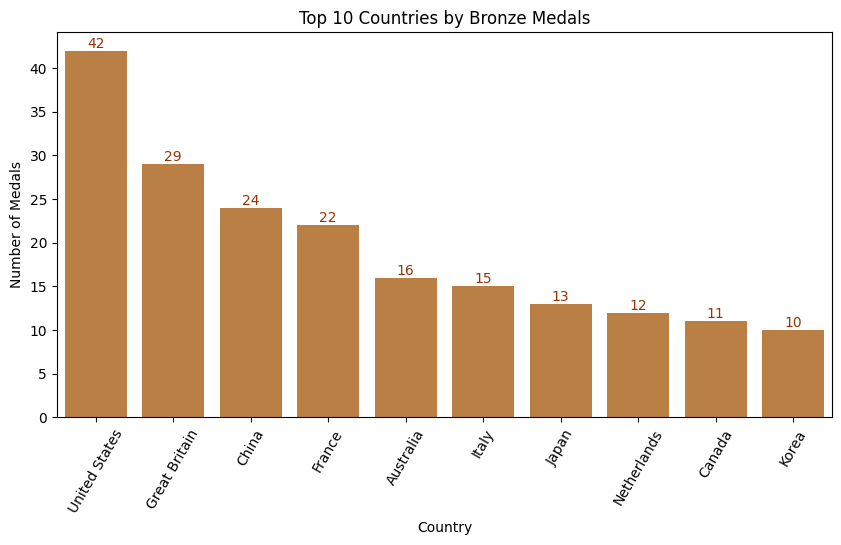

In [86]:
top_10_bronze = da_country_medals.sort_values(by = "Bronze Medal", ascending = False).head(10)

plt.figure(figsize=(10,5))
ax = sns.barplot(data = top_10_bronze,x = "country", y = "Bronze Medal", hue = "country", palette=["#cd7f32"])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', va='bottom', 
            fontsize=10,color='#993300'
               )
plt.title("Top 10 Countries by Bronze Medals")
plt.xlabel("Country")
plt.ylabel("Number of Medals")
plt.xticks(rotation=60)
plt.show()

Conclusion - This bar chart presents the top 10 countries with the highest number of Bronze medals. It provides a visual representation of the countries that have consistently secured third-place finishes in various sports.

The United States' strong performance in Bronze medals further reinforces its status as a leading force in the world of sports.

European nations remain influential contributors to the global sports arena, drawing upon their extensive sporting heritage and traditions.

The rising tally of Bronze medals for Asian nations indicates a transformation in the global dynamics of sports competition.

### Distribution of Medal Types (Gold, Silver, Bronze) across All Events

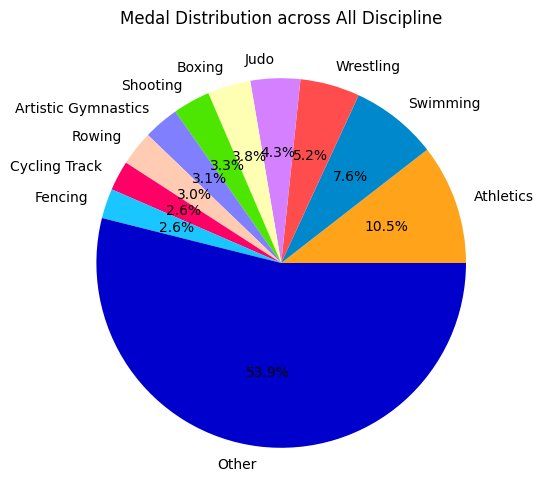

In [39]:
discipline_medals = da_medals.groupby("discipline")["medal_type"].size().reset_index()
discipline_medals.columns = ["discipline", "all_medals"]
top_10_disciplines = discipline_medals.sort_values("all_medals", ascending= False).head(10)
other_disciplines =discipline_medals.iloc[10:]
total_other_disciplines = other_disciplines["all_medals"].sum()
labels = pd.concat([top_10_disciplines["discipline"].reset_index(drop=True),pd.Series("Other")])
total_medal_disciplines = pd.concat([top_10_disciplines["all_medals"].reset_index(drop=True),pd.Series(total_other_disciplines)])
color = ["#ffa31a","#0088cc","#ff4d4d","#d580ff","#ffffb3","#4ce600","#8080ff","#ffccb3","#ff0066","#1ac6ff","#0000cc"]

plt.figure(figsize=(6,6))
plt.pie(total_medal_disciplines,labels = labels , autopct="%1.1f%%", colors = color)

plt.title("Medal Distribution across All Discipline")
plt.show()

Conclusion - This pie chart provides a visual representation of the distribution of medals across various sports disciplines. It highlights the dominance of Athletics and the relative contributions of other sports.

The dominance of Athletics suggests its importance in the overall sporting landscape and its ability to attract a large number of participants and generate significant interest.

While Athletics dominates, other sports have the potential to increase their medal share through focused training, improved infrastructure, and increased participation.

While Athletics dominates, other sports have the potential to increase their medal share through focused training, improved infrastructure, and increased participation.

### Medal Distribution across Gender  

Here gender column indicate

M --> Male

W --> Women

X --> Mix Team(Inluding Male & Female

O --> Special case

Medal Distribution By Gender:
  gender  count
0      M    502
1      W    478
2      X     43
3      O     21


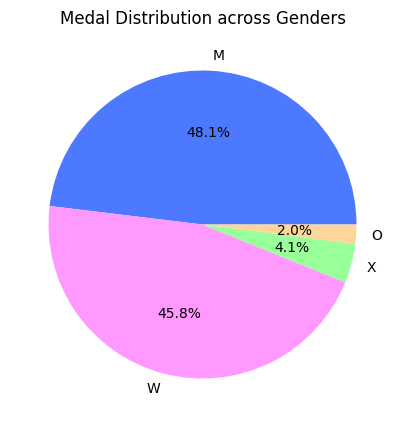

In [88]:
gender_distribution = da_medals["gender"].value_counts()
print("Medal Distribution By Gender:") 
print(gender_distribution.reset_index())

plt.figure(figsize=(10,5))
plt.pie(gender_distribution.values, labels = gender_distribution.index, autopct = "%1.1f%%", colors= ["#4d79ff","#ff99ff","#99ff99","#ffd699"])

plt.title("Medal Distribution across Genders")
plt.show()

Conclusion - This chart presents the distribution of medals across different genders: Male (M), Female (W), Mixed Team (X), and Special Case (O). It provides a visual representation of the gender breakdown of medal winners.

The distribution of medals between Male and Female athletes is relatively balanced, suggesting a degree of gender parity in the event or competition.

The small percentage of medals awarded to "Mixed Team" and "Special Case" categories highlights the potential for further inclusivity and representation of diverse gender identities.

The category of "Special Case" may indicate a lack of data collection or reporting on gender identity, which could hinder efforts to promote inclusivity and equality.

### Events Type 

Events Type
event_type
ATH      494
HATH     266
TEAM     147
HTEAM    100
HCOUP     21
COUP      16
Name: count, dtype: int64


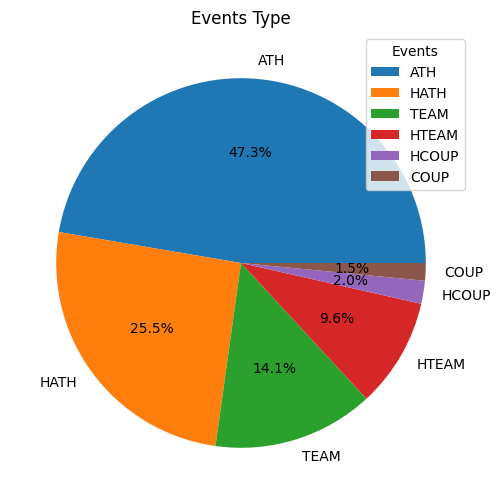

In [89]:
event_type = da_medals["event_type"].value_counts()
print("Events Type")
print(event_type)

plt.figure(figsize=(10,6))
plt.pie(event_type.values, labels = event_type.index, autopct= "%1.1f%%")
plt.title("Events Type")
plt.legend(title = "Events")
plt.show()

Conclusion - This chart provides a visual representation of the distribution of different event types within this specific dataset.

The "ATH" category clearly dominates the distribution, accounting for approximately 47.3% of the total events. 

The "HATH" and "TEAM" categories follow closely behind, contributing 25.5% and 14.1% of the total events, respectively.

The remaining categories, "HTEAM," "HCOUP," and "COUP," have relatively smaller contributions to the overall distribution. 


### Medal Distribution across Discipline with Gender

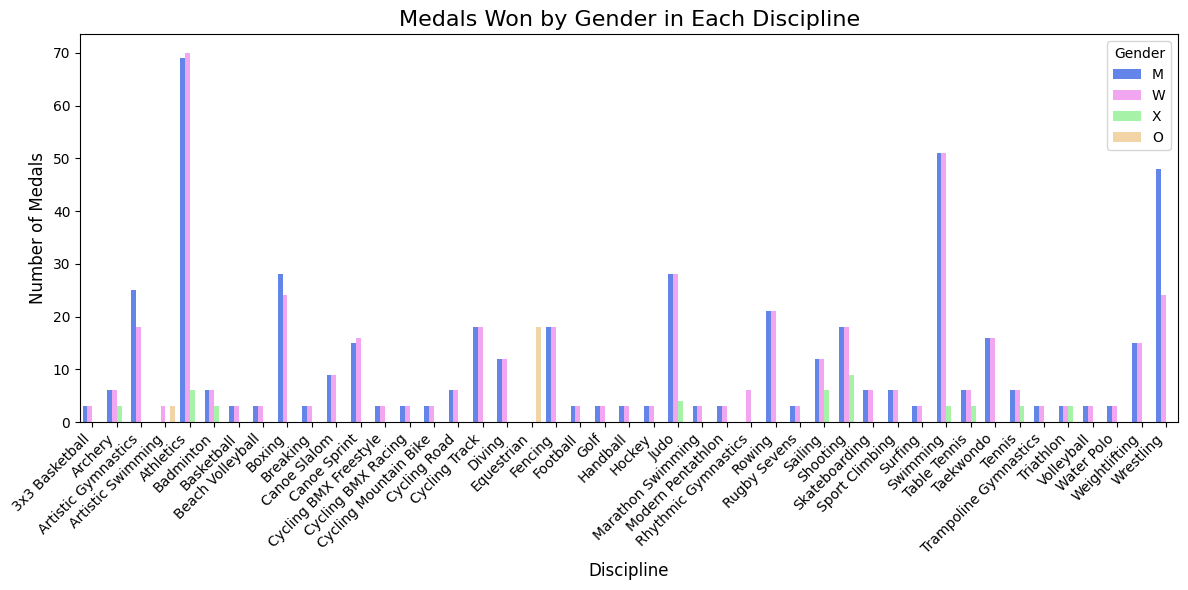

In [42]:
gender_discipline = da_medals.groupby(["discipline","gender"]).size().reset_index(name = "medal_count")
gender_discipline

plt.figure(figsize=(12, 6))
sns.barplot(x="discipline", y="medal_count", hue="gender", data=gender_discipline, palette=["#4d79ff","#ff99ff","#99ff99","#ffd699"])
plt.title("Medals Won by Gender in Each Discipline", fontsize=16)
plt.xlabel("Discipline", fontsize=12)
plt.ylabel("Number of Medals", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

Conclusion - This bar chart provides a visual comparison of the number of medals won by different genders (Male, Female, Mixed Team, and Special Case) in various sports disciplines.

The data suggests a significant gender disparity in many sports, with male athletes dominating in most disciplines.

### Top 5 Disciplines in terms of Medal Count

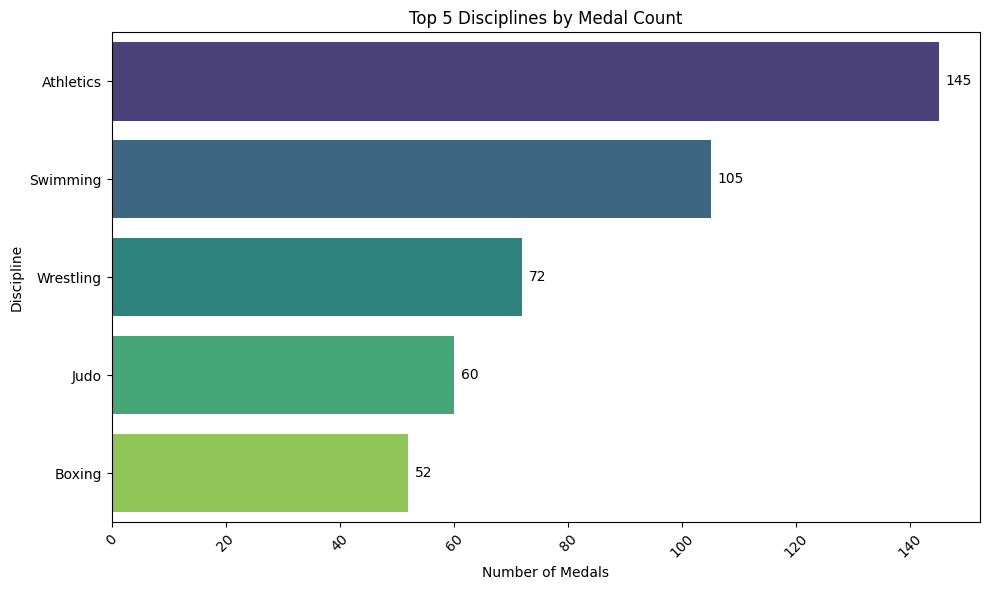

In [43]:
discipline_medal_count = da_medals["discipline"].value_counts().reset_index()
discipline_medal_count.columns = ["discipline", "medal_count"]
top_5_disciplines = discipline_medal_count.head(5)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_5_disciplines, x="medal_count", y="discipline", palette="viridis")
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}',       
                (p.get_width(), p.get_y() + p.get_height() / 2),  
                ha="left", va="center",
                fontsize=10, color="black", xytext=(5, 0),
                textcoords="offset points")

plt.title("Top 5 Disciplines by Medal Count")
plt.xlabel("Number of Medals")
plt.ylabel("Discipline")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Conclusion - This horizontal bar chart visualizes the top 5 disciplines based on the total number of medals awarded.

The dominance of Athletics suggests its importance in the overall sporting landscape and its ability to attract a large number of participants and generate significant interest.

The presence of various sports in the top 5 highlights the diverse range of athletic activities and the global interest in different disciplines.

### Performance of Top 10 Countries in Individual vs. Team Events

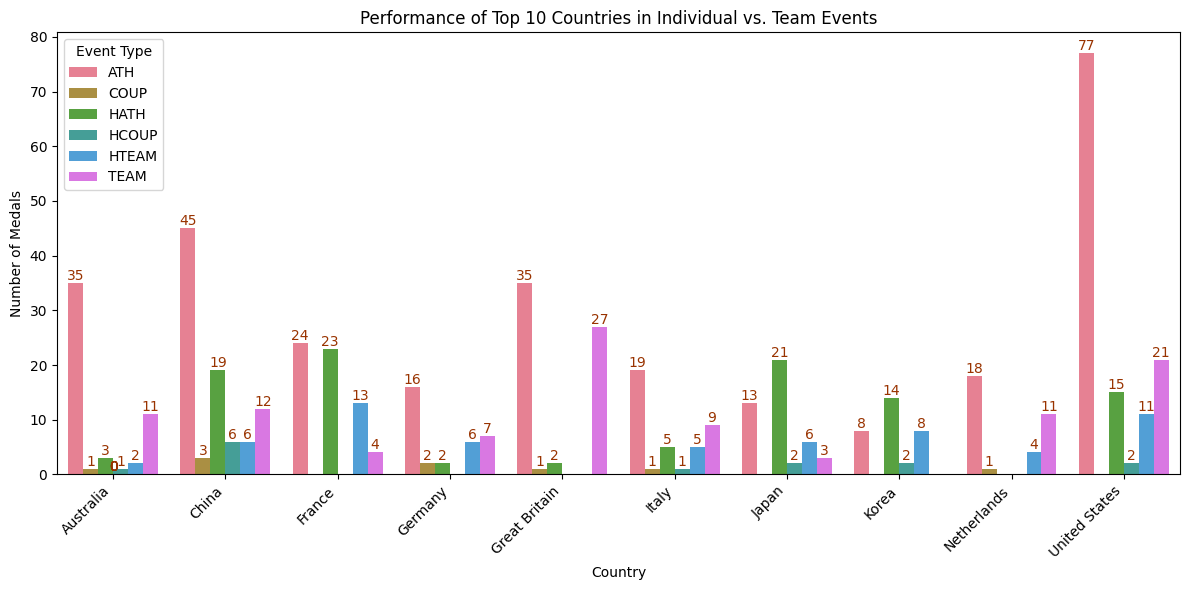

In [90]:
country_event_performance = da_medals.groupby(["country", "event_type"]).size().reset_index(name="medal_count")

top_countries = country_event_performance.groupby("country")["medal_count"].sum().nlargest(10).index

top_country_event_performance = country_event_performance[country_event_performance["country"].isin(top_countries)]

plt.figure(figsize=(12, 6))
ax = sns.barplot(data = top_country_event_performance, x = "country", y = "medal_count", hue="event_type", palette="husl")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', va='bottom', 
            fontsize=10,color='#993300'
               )

plt.title("Performance of Top 10 Countries in Individual vs. Team Events")
plt.xlabel("Country")
plt.ylabel("Number of Medals")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Event Type")
plt.tight_layout()
plt.show()

Conclusion - This stacked bar chart provides a visual comparison of the number of medals won by the top 10 countries, categorized by individual and team events.

Many countries prioritize individual sports, investing resources in developing individual talent and providing opportunities for athletes to excel in individual events.

A balanced approach, focusing on both individual and team sports, can lead to overall success in international competitions.

### Top 10 Countries Performence in Medal Winning Discipline 

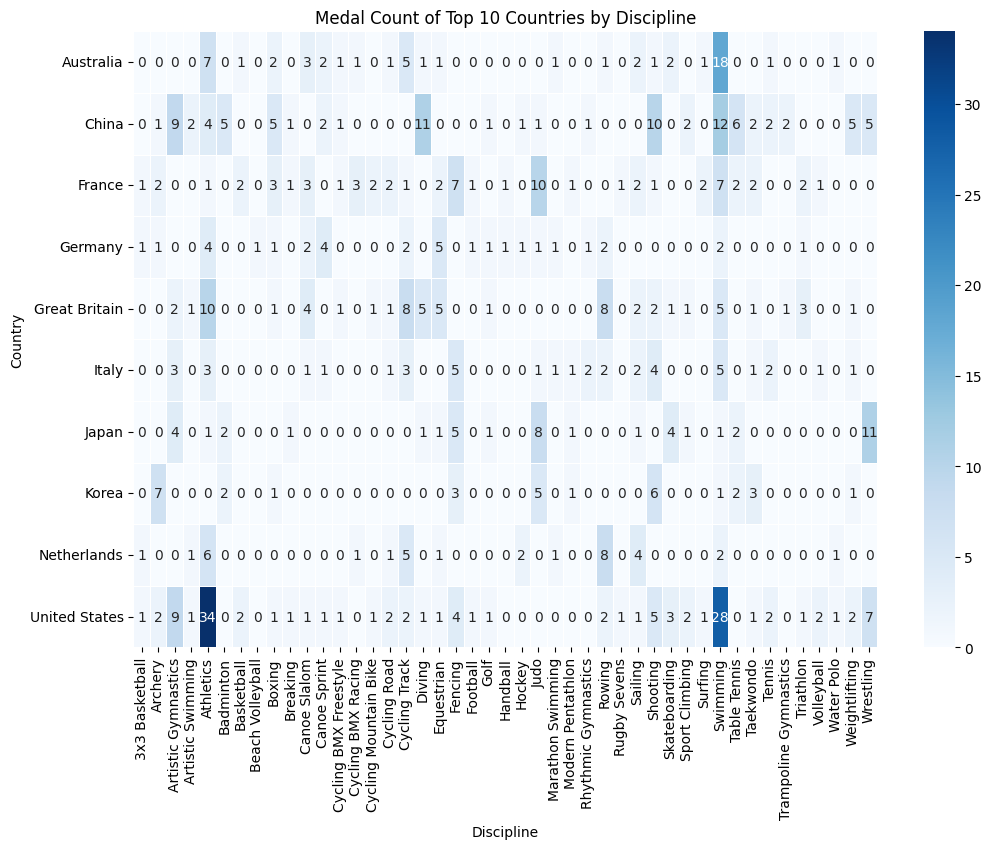

In [45]:
grouped_data = da_medals.groupby(["country", "discipline"]).size().reset_index(name="medal_count")

total_medals_per_country = da_medals.groupby("country").size().reset_index(name="total_medals")

top_10_countries = total_medals_per_country.nlargest(10, "total_medals")["country"]

top_10_grouped_data = grouped_data[grouped_data["country"].isin(top_10_countries)]

heatmap_data = top_10_grouped_data.pivot_table(values="medal_count", index="country", columns="discipline", fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="Blues", linewidths=0.5, annot=True)

plt.title("Medal Count of Top 10 Countries by Discipline")
plt.xlabel("Discipline")
plt.ylabel("Country")
plt.show()

Conclusion - This heatmap provides a visual representation of the medal count of the top 10 countries across various disciplines. The color intensity indicates the number of medals won by each country in each discipline.

 The US dominance across multiple disciplines where European countries continues to leverage their focused sporting culture. On the other hand Asian countries also becoming a balance of power in sports by increasing medal count. 
 

### Medal Distribution Date Wise

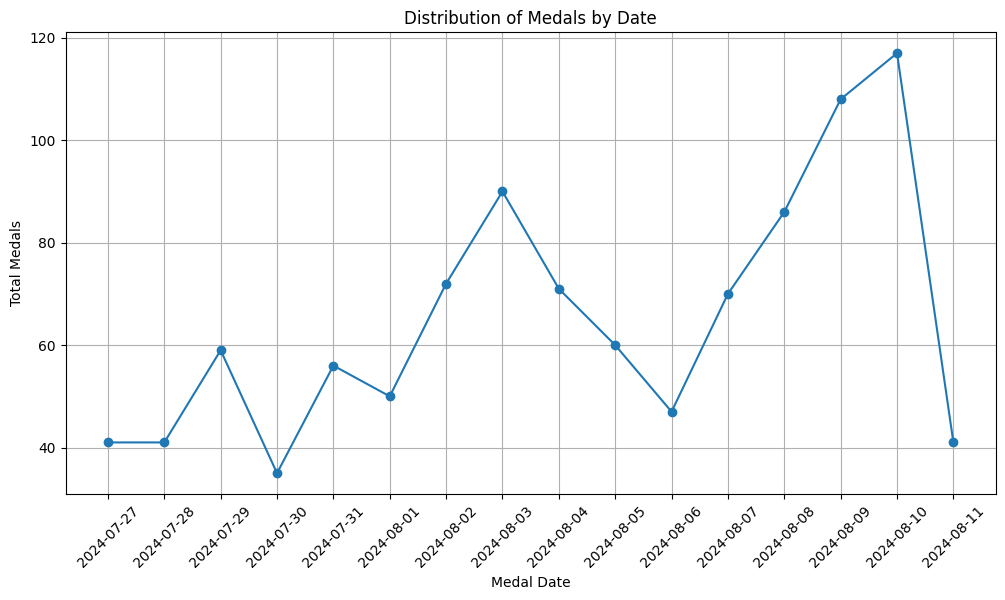

In [46]:
medals_by_date = da_medals.groupby('medal_date')['medal_type'].count().reset_index()

medals_by_date.columns = ['medal_date', 'total_medals']

medals_by_date = medals_by_date.sort_values('medal_date')

plt.figure(figsize=(12,6))
plt.plot(medals_by_date['medal_date'], medals_by_date['total_medals'], marker='o')
plt.title('Distribution of Medals by Date')
plt.xlabel('Medal Date')
plt.ylabel('Total Medals')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Conclusion - This line chart visualizes the distribution of medals awarded over a specific period, likely during The Olympic 2024. It shows fluctuations in the number of medals awarded on a daily basis.

 The fluctuating pattern suggests that the event may have been structured with specific days dedicated to certain sports or categories, leading to concentrated medal ceremonies.

 Despite the fluctuations, the chart shows a general trend of increasing medal distribution towards the end of the period, indicating a potential climax or final phase of the Olympics.

## Coach Data Analysis

In [47]:
da_coaches.head()

,code,current,name,gender,function,category,country_code,country,country_long,disciplines,events,birth_date
0,1533246,True,PEDRERO Ofelia,Female,Coach,C,MEX,Mexico,Mexico,Artistic Swimming,Duet,28-03-1988
1,1535775,True,RADHI SHENAISHIL,Male,Head Coach,C,IRQ,Iraq,Iraq,Football,Team,01-07-1965
2,1536055,True,AFLAKIKHAMSEH Majid,Male,Coach,C,IRI,IR Iran,Islamic Republic of Iran,Taekwondo,Men,26-08-1973
3,1536059,True,YOUSEFY Mehrdad,Male,Coach,C,IRI,IR Iran,Islamic Republic of Iran,Taekwondo,Men,12-06-1972
4,1536060,True,MADDAH Minoo,Female,Coach,C,IRI,IR Iran,Islamic Republic of Iran,Taekwondo,Women,17-05-1976


In [48]:
da_coaches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   code          974 non-null    int64 
 1   current       974 non-null    bool  
 2   name          974 non-null    object
 3   gender        974 non-null    object
 4   function      974 non-null    object
 5   category      974 non-null    object
 6   country_code  974 non-null    object
 7   country       974 non-null    object
 8   country_long  974 non-null    object
 9   disciplines   974 non-null    object
 10  events        974 non-null    object
 11  birth_date    974 non-null    object
dtypes: bool(1), int64(1), object(10)
memory usage: 84.8+ KB


In [49]:
da_coaches.isnull().sum()

code            0
current         0
name            0
gender          0
function        0
category        0
country_code    0
country         0
country_long    0
disciplines     0
events          0
birth_date      0
dtype: int64

### Distribution of Coaches by Gender

In [50]:
coaches_gender_count = da_coaches["gender"].value_counts().reset_index()
coaches_gender_count

,gender,count
0,Male,743
1,Female,231


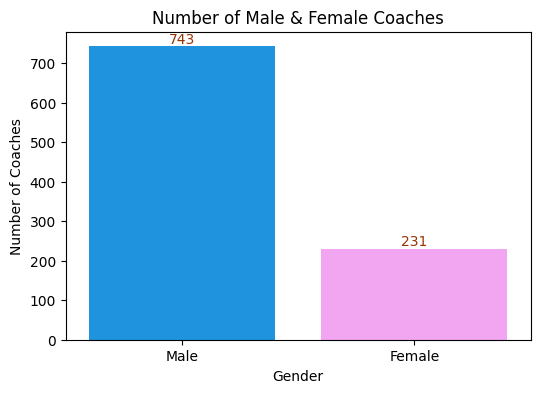

In [51]:
plt.figure(figsize=(6,4))
ax = sns.barplot(data = coaches_gender_count,x = "gender", y = "count", hue = "gender", palette = ["#0099ff","#ff99ff"])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10,color='#993300'
               )

plt.title("Number of Male & Female Coaches")
plt.xlabel("Gender")
plt.ylabel("Number of Coaches")
plt.show()

Conclusion - This bar chart presents the distribution of coaches based on gender. It clearly shows a significant difference in the number of male and female coaches.

The chart reveals a significant dominance of male coaches. The number of male coaches is significantly higher than the number of female coaches. The disparity in the number of male and female coaches highlights a potential gender imbalance in coaching roles.

Societal and cultural norms may influence the choice of coaching as a profession, with traditional gender roles favoring male participation. Female coaches may face barriers and challenges in accessing coaching opportunities, including discrimination, lack of support, and limited career pathways.

### Coaches from All Discipline

In [52]:
coaches_discipline = da_coaches["disciplines"].value_counts().reset_index()
coaches_discipline

,disciplines,count
0,Artistic Gymnastics,171
1,Taekwondo,133
2,Basketball,104
3,Football,90
4,Volleyball,81
5,Rugby Sevens,80
6,Hockey,75
7,Handball,70
8,Rhythmic Gymnastics,63
9,Water Polo,55


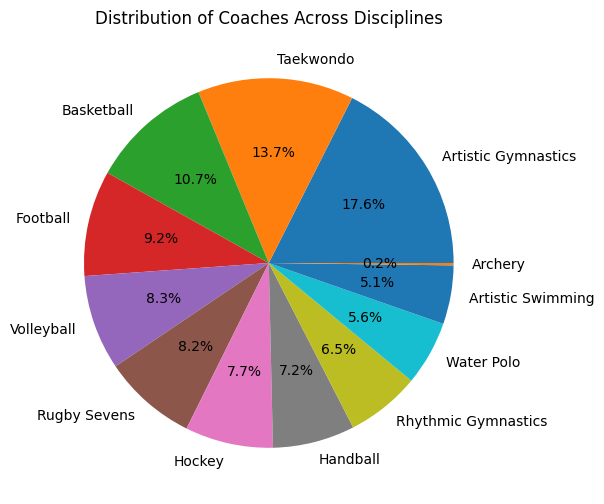

In [53]:
plt.figure(figsize=(8,6))
plt.pie(coaches_discipline["count"], labels=coaches_discipline["disciplines"],autopct="%1.1f%%")
plt.title("Distribution of Coaches Across Disciplines")
plt.show()

Conclusion - This pie chart provides a visual representation of the distribution of coaches across various sports disciplines. It shows the relative proportions of coaches working in different sports.

Sports with higher levels of participation and competition tend to have a larger number of coaches.
The distribution of coaches reflects the demand for coaching expertise in different sports and it can help in allocating resources and support to different sports based on their coaching needs.

### Coaches form Countries 

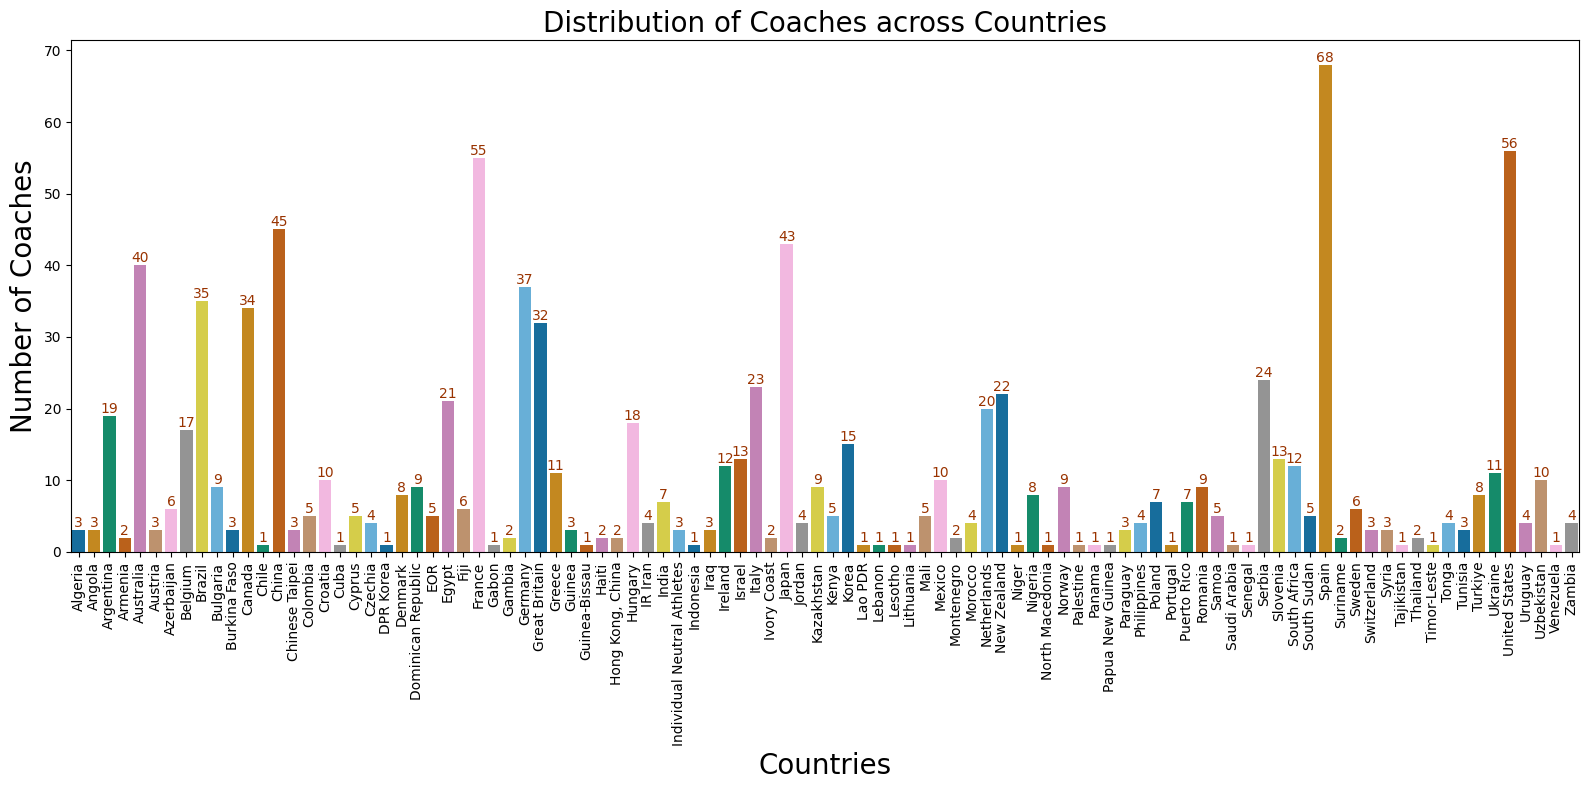

In [54]:
coache_country = da_coaches.groupby("country").size().reset_index(name ="count").sort_values(by ="country",ascending=True)

plt.figure(figsize=(16,8))
ax = sns.barplot(data = coache_country, x = "country", y = "count", hue = "country", palette= "colorblind")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10,color='#993300'
               )

plt.title("Distribution of Coaches across Countries", fontsize = 20)
plt.xlabel("Countries", fontsize = 20)
plt.ylabel("Number of Coaches", fontsize = 20)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

Conclusion - This bar chart provides a visual representation of the distribution of coaches across various countries. It shows the number of coaches from each country, highlighting variations in coaching resources and infrastructure.

The uneven distribution of coaches reflects disparities in resources, infrastructure, and investment in sports development across different countries.

Countries with a larger number of coaches may have better opportunities for talent identification, training, and development.

### Function of Coaches

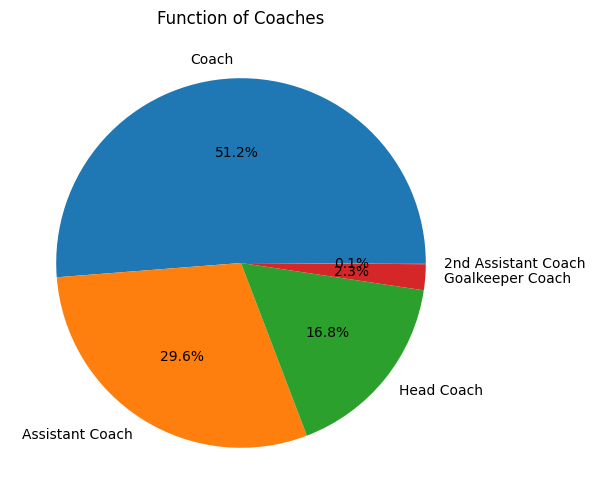

In [55]:
coach_function = da_coaches["function"].value_counts().reset_index(name = "count")

plt.figure(figsize=(8,6))
plt.pie(coach_function["count"], labels=coach_function["function"],autopct = "%1.1f%%")
plt.title("Function of Coaches")
plt.show()

Conclusion - This pie chart provides a visual representation of the distribution of coaching roles within a specific context. It shows the relative proportions of different coaching functions.

The dominance of "Coach" and "Assistant Coach" roles suggests that these are the primary roles required for effective team management and player development. The presence of specialized roles like "Goalkeeper Coach" indicates a recognition of the unique needs of specific positions and the importance of specialized coaching expertise.

### Coach Age Analysis 

### KPI - Average Age of All Coaches

In [56]:
da_coaches["birth_date"] = pd.to_datetime(da_coaches["birth_date"],errors = "coerce")
raference_date = datetime(2024, 7, 26)
da_coaches["age"] = (raference_date - da_coaches["birth_date"]).dt.days // 365
coach_average_age = int(da_coaches["age"].mean())
print("Average Coaches Age:",coach_average_age,"years")

Average Coaches Age: 46 years


### KPI - Average Age of the Coaches by Gender

In [57]:
avg_male_coach_age = int(da_coaches[da_coaches["gender"]=="Male"]["age"].mean())
avg_female_coach_age = int(da_coaches[da_coaches["gender"]=="Female"]["age"].mean())

print("Average Male Coachs age is:",avg_male_coach_age,"years") 
print("Average Female Coaches age is:",avg_female_coach_age,"years")

Average Male Coachs age is: 46 years
Average Female Coaches age is: 43 years


### Info

In [58]:
male_coach= da_coaches[da_coaches["gender"] == "Male"]
young_male_coach = male_coach.loc[male_coach['age'].idxmin()]
old_male_coach = male_coach.loc[male_coach['age'].idxmax()]

female_coach = da_coaches[da_coaches["gender"] == "Female"]
young_female_coach = female_coach.loc[female_coach['age'].idxmin()]
old_female_coach = female_coach.loc[female_coach['age'].idxmax()]

print("Youngest and Oldest Coach by Gender")
print(" ")
print(f"Youngest Male Coach: Name- {young_male_coach['name']}, Age- {young_male_coach['age']}, Disciplines- {young_male_coach['disciplines']}, Country- {young_male_coach['country_long']}")
print(" ")
print(f"Oldest Male Coach: Name- {old_male_coach['name']}, Age- {old_male_coach['age']}, Disciplines- {old_male_coach['disciplines']}, Country- {old_male_coach['country_long']}")
print(" ")
print(f"Youngest Female Coach: Name- {young_female_coach['name']}, Age- {young_female_coach['age']}, Disciplines- {young_female_coach['disciplines']}, Country- {young_female_coach['country_long']}")
print(" ")
print(f"Oldest Female Coach: Name- {old_female_coach['name']}, Age- {old_female_coach['age']}, Disciplines- {old_female_coach['disciplines']}, Country- {old_female_coach['country_long']}")

Youngest and Oldest Coach by Gender
 
Youngest Male Coach: Name- ABAD EXPOSITO Iker Miquel, Age- 20, Disciplines- Taekwondo, Country- Ireland
 
Oldest Male Coach: Name- CHOEN Haim, Age- 80, Disciplines- Football, Country- Israel
 
Youngest Female Coach: Name- MARTON Luana, Age- 18, Disciplines- Taekwondo, Country- Hungary
 
Oldest Female Coach: Name- BARANOVA VOLCHETSKAYA Anna, Age- 72, Disciplines- Rhythmic Gymnastics, Country- France


### Coach Age Distribution

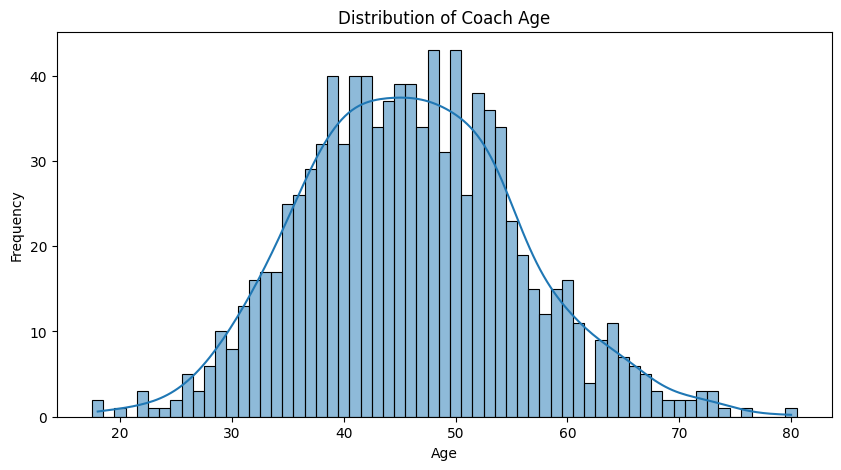

In [59]:
plt.figure(figsize=(10,5))
sns.histplot(data = da_coaches, x = "age", bins = 10, discrete= True, kde = True,)
plt.title ("Distribution of Coach Age")
plt.xlabel("Age") 
plt.ylabel("Frequency")
plt.show()

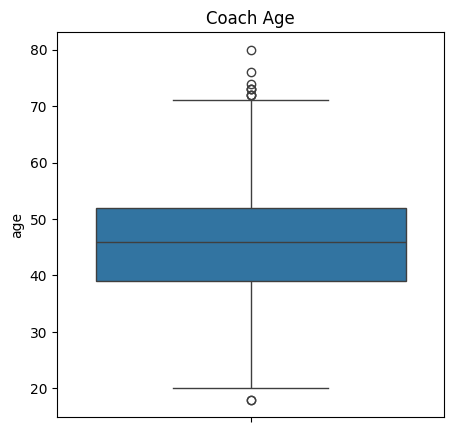

In [61]:
plt.figure(figsize=(5,5))
sns.boxplot(da_coaches, y = "age")
plt.title("Coach Age")
plt.show()

Conclusion - This histogram and the boxplot provides a visual representation of the distribution of coach ages. The peak around the age of 50 suggests that many coaches have significant experience in the field. The age range of coaches is quite wide, spanning from around 20 to 80 years old. This suggests that coaching is a profession that attracts people of various ages and life stages.

### Distribution of Coache's Age By Gender

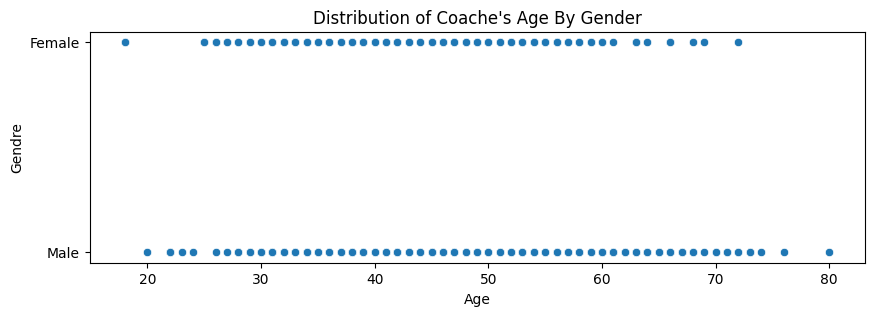

In [60]:
plt.figure(figsize=(10,3))
sns.scatterplot(data = da_coaches, x = "age", y = "gender")
plt.title ("Distribution of Coache's Age By Gender")
plt.xlabel("Age") 
plt.ylabel("Gendre")
plt.show()

Conclusion - This scatter plot presents the distribution of coach ages by gender. The limited representation of female coaches suggests a potential gender imbalance in coaching roles. This could be due to various factors, such as societal expectations, opportunities, and barriers to entry for women in coaching. The wide age range of coaches suggests a diverse pool of experience and perspectives within the coaching profession.

## Venues Analysis

In [62]:
da_vanues.head()

,venue,sports,date_start,date_end,tag,url
0,Aquatics Centre,"['Artistic Swimming', 'Diving', 'Water Polo']",2024-07-27T09:00:00Z,2024-08-10T20:00:00Z,aquatics-centre,https://olympics.com/en/paris-2024/venues/aqua...
1,Bercy Arena,"['Artistic Gymnastics', 'Basketball', 'Trampol...",2024-07-27T09:00:00Z,2024-08-11T16:00:00Z,bercy-arena,https://olympics.com/en/paris-2024/venues/berc...
2,Bordeaux Stadium,['Football'],2024-07-25T17:00:00Z,2024-08-02T21:59:00Z,bordeaux-stadium,https://olympics.com/en/paris-2024/venues/bord...
3,Champ de Mars Arena,"['Judo', 'Wrestling']",2024-07-27T08:00:00Z,2024-08-11T12:00:00Z,champ-de-mars-arena,https://olympics.com/en/paris-2024/venues/cham...
4,Château de Versailles,"['Equestrian', 'Modern Pentathlon']",2024-07-27T07:30:00Z,2024-08-11T11:30:00Z,chateau-de-versailles,https://olympics.com/en/paris-2024/venues/chat...


In [63]:
da_vanues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   venue       35 non-null     object
 1   sports      35 non-null     object
 2   date_start  35 non-null     object
 3   date_end    35 non-null     object
 4   tag         35 non-null     object
 5   url         35 non-null     object
dtypes: object(6)
memory usage: 1.8+ KB


In [64]:
da_vanues.isnull().sum()

venue         0
sports        0
date_start    0
date_end      0
tag           0
url           0
dtype: int64

### KPI - Total Venue 

In [65]:
total_venue = da_vanues["venue"].count()
print("Total Venue for This Olympic Edition:", total_venue)

Total Venue for This Olympic Edition: 35


### Venues of Sports

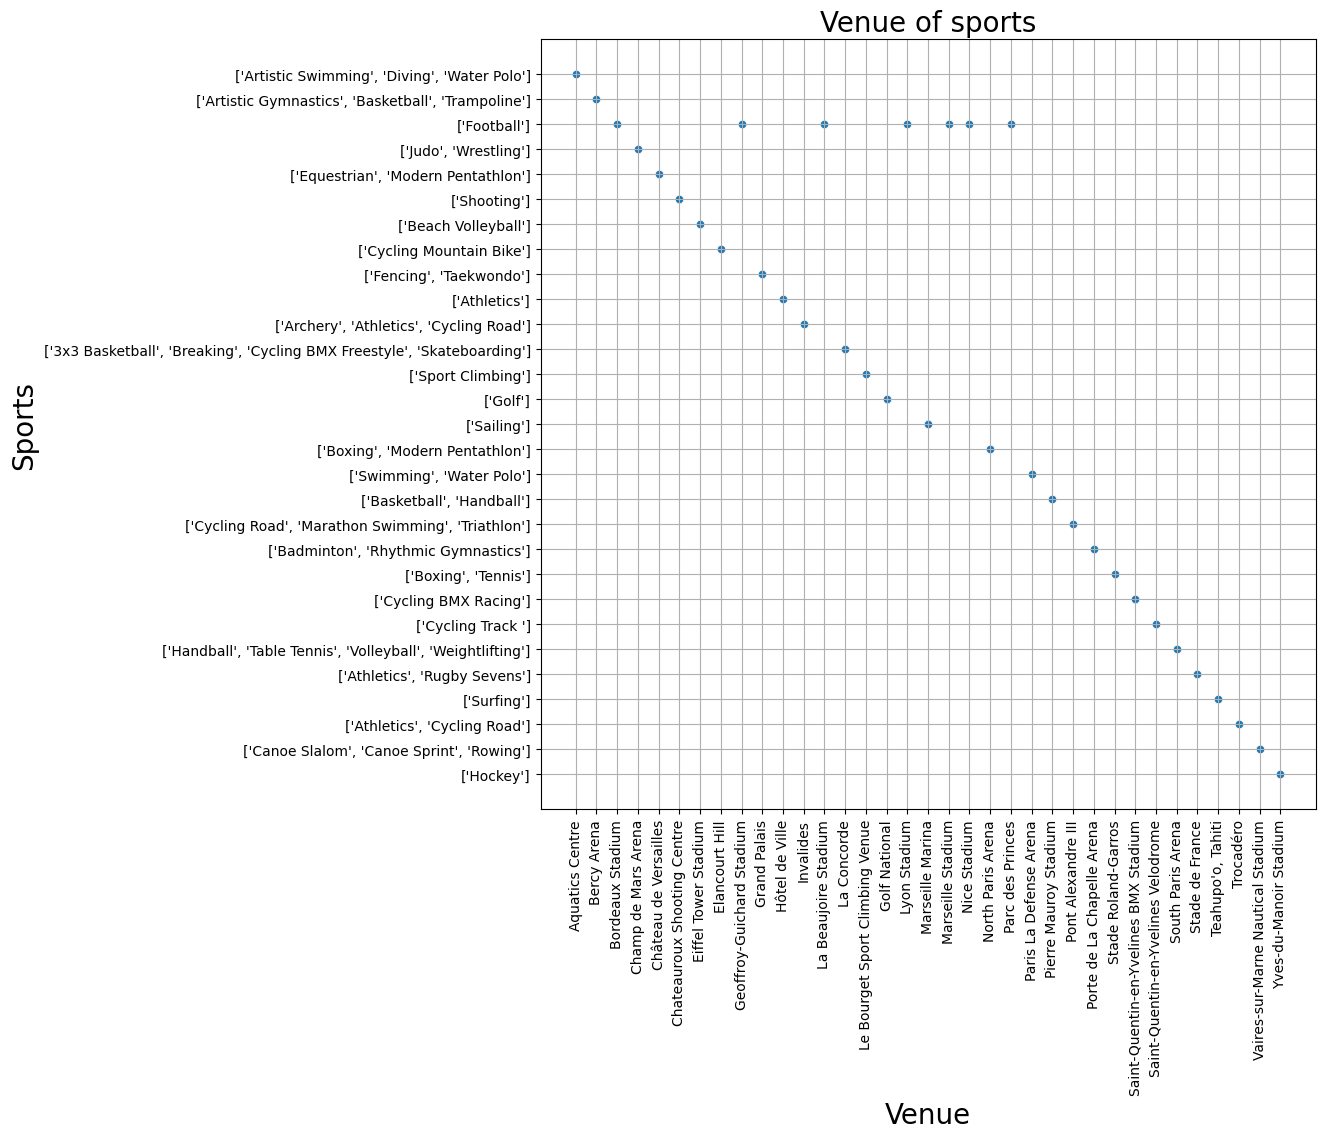

In [66]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = da_vanues, x = "venue", y = "sports")
plt.title("Venue of sports",fontsize = 20)
plt.xlabel("Venue",fontsize = 20)
plt.xticks(rotation = 90)
plt.ylabel("Sports",fontsize = 20)
plt.grid(True)
plt.show()

Conclusion - This chart provides a visual representation of the relationship between different sports and the venues where they will be held during the Paris 2024 Olympics.

The use of multipurpose venues allows for efficient use of resources and minimizes the need for constructing new facilities.
The venues are spread across different locations in and around Paris, showcasing the city's diverse sporting infrastructure and its ability to host events in various settings.

### Event Duration 

In [67]:
da_vanues["duration"]= (pd.to_datetime(da_vanues["date_end"])-pd.to_datetime(da_vanues["date_start"]))
da_vanues.head()

,venue,sports,date_start,date_end,tag,url,duration
0,Aquatics Centre,"['Artistic Swimming', 'Diving', 'Water Polo']",2024-07-27T09:00:00Z,2024-08-10T20:00:00Z,aquatics-centre,https://olympics.com/en/paris-2024/venues/aqua...,14 days 11:00:00
1,Bercy Arena,"['Artistic Gymnastics', 'Basketball', 'Trampol...",2024-07-27T09:00:00Z,2024-08-11T16:00:00Z,bercy-arena,https://olympics.com/en/paris-2024/venues/berc...,15 days 07:00:00
2,Bordeaux Stadium,['Football'],2024-07-25T17:00:00Z,2024-08-02T21:59:00Z,bordeaux-stadium,https://olympics.com/en/paris-2024/venues/bord...,8 days 04:59:00
3,Champ de Mars Arena,"['Judo', 'Wrestling']",2024-07-27T08:00:00Z,2024-08-11T12:00:00Z,champ-de-mars-arena,https://olympics.com/en/paris-2024/venues/cham...,15 days 04:00:00
4,Château de Versailles,"['Equestrian', 'Modern Pentathlon']",2024-07-27T07:30:00Z,2024-08-11T11:30:00Z,chateau-de-versailles,https://olympics.com/en/paris-2024/venues/chat...,15 days 04:00:00


### INFO - Longest Event 

In [68]:
longest_event =  da_vanues.loc[da_vanues["duration"].idxmax()]

longest_event.reset_index(name = "details")

,index,details
0,venue,Nice Stadium
1,sports,['Football']
2,date_start,2024-07-25T15:00:00Z
3,date_end,2024-08-31T21:00:00Z
4,tag,nice-stadium
5,url,https://olympics.com/en/paris-2024/venues/nice...
6,duration,37 days 06:00:00


### INFO - Shortest Event

In [69]:
shortest_event = da_vanues.loc[da_vanues["duration"].idxmin()]

shortest_event.reset_index(name = "details")

,index,details
0,venue,Elancourt Hill
1,sports,['Cycling Mountain Bike']
2,date_start,2024-07-28T12:00:00Z
3,date_end,2024-07-29T14:30:00Z
4,tag,elancourt-hill
5,url,https://olympics.com/en/paris-2024/venues/elan...
6,duration,1 days 02:30:00


### Duration And Venue

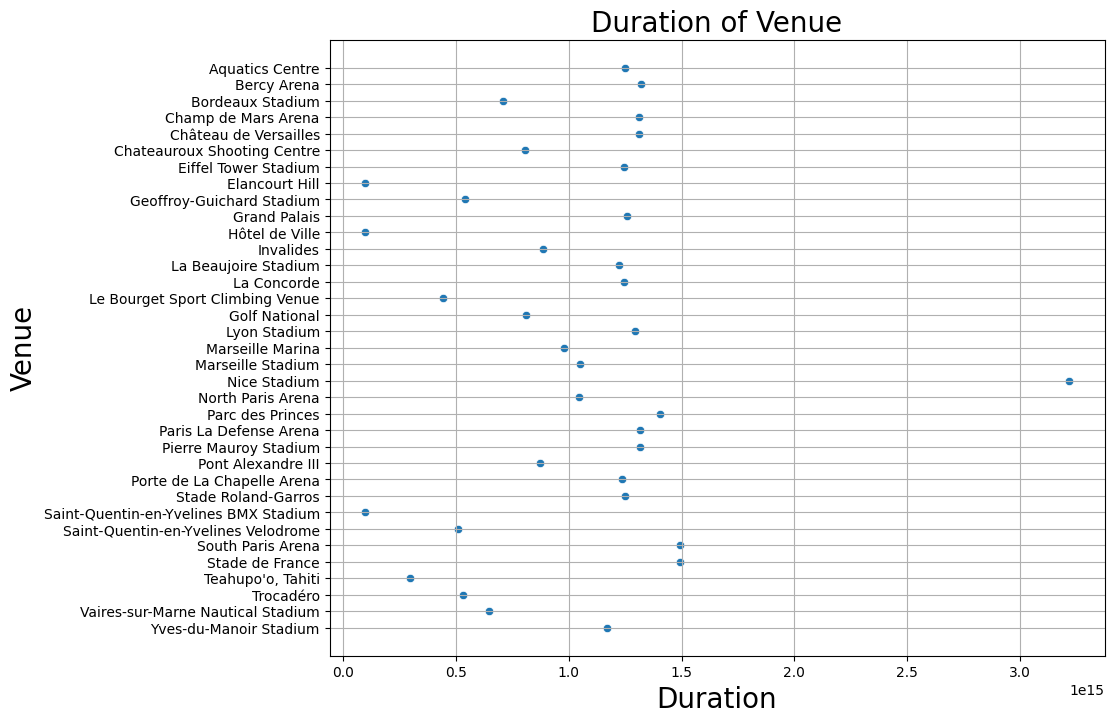

In [70]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = da_vanues, x = "duration", y = "venue")
plt.title("Duration of Venue",fontsize = 20 )
plt.xlabel("Duration", fontsize = 20)
plt.ylabel("Venue",fontsize = 20)
plt.grid(True)
plt.show()
    

Conclusion - This scatter plot presents the duration of various venues used for the Paris 2024 Olympics. 

There are clusters of venues with similar durations, suggesting that certain venues may be used for multiple sports or events within a specific timeframe. A few venues stand out with significantly longer durations, potentially indicating their importance as central hubs for multiple events or their use for training and preparation purposes.

## Event Analysis

In [71]:
da_events.head()

,event,tag,sport,sport_code,sport_url
0,Men's Individual,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery
1,Women's Individual,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery
2,Men's Team,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery
3,Women's Team,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery
4,Mixed Team,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery


In [72]:
da_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event       329 non-null    object
 1   tag         329 non-null    object
 2   sport       329 non-null    object
 3   sport_code  329 non-null    object
 4   sport_url   329 non-null    object
dtypes: object(5)
memory usage: 13.0+ KB


In [73]:
da_events.isnull().sum()

event         0
tag           0
sport         0
sport_code    0
sport_url     0
dtype: int64

### KPI - Number of Sports

In [74]:
total_sports = da_events["sport"].nunique()
print("Total Sports category in this Olympic:",total_sports)

Total Sports category in this Olympic: 45


### KPI - Number of Game

In [75]:
total_events = da_events["event"].count()
print("Total Games in this Olympic:",total_events)

Total Games in this Olympic: 329


### Event Count

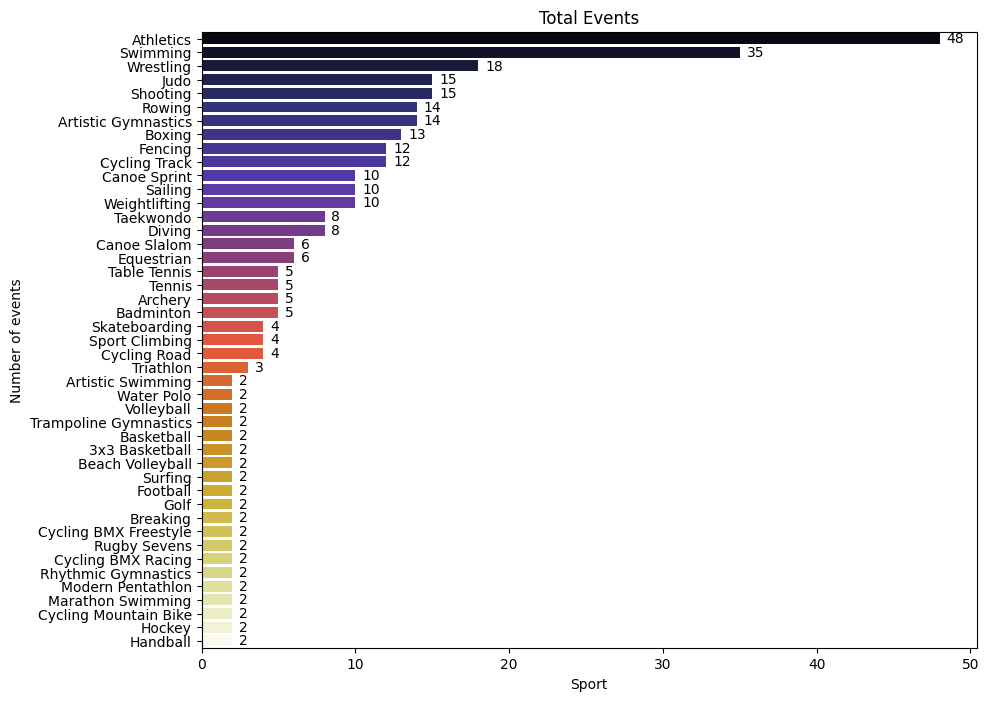

In [76]:
event_count = da_events["sport"].value_counts().reset_index(name = "count")

plt.figure(figsize=(10,8))
ax = sns.barplot(data = event_count, x="count", y="sport",hue="sport", palette="CMRmap")
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}',       
                (p.get_width(), p.get_y() + p.get_height() / 2),  
                ha='left', va='center',
                fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')

plt.title("Total Events")
plt.xlabel("Sport")
plt.ylabel("Number of events")
plt.show()

Conclusion - This horizontal bar chart visualizes the total number of events in each sport during the Paris 2024 Olympics.

The Paris 2024 Olympics features a diverse range of sports, catering to different interests and showcasing a variety of athletic abilities.

The Olympic program balances individual and team sports, providing opportunities for athletes to compete at both individual and collective levels.

The inclusion of new sports like skateboarding and sport climbing reflects the evolving nature of the Olympics and its efforts to attract younger audiences.

# Overall
This EDA has provided valuable insights into the Paris 2024 Olympics. By examining various aspects of the data, we have gained a comprehensive understanding of the event's key features, trends, and potential areas of interest for further exploration. The Olympics showcase a wide range of sports, athletes from numerous countries participate. The inclusion of both male and female athletes reflects the growing emphasis on gender equality in sports. The efficient utilization of various venues ensures a smooth running of the event. By continuing to explore and analyze the rich dataset of the Paris 2024 Olympics, we can unlock valuable insights and contribute to the future of sports and global events.